# Plot anhydrite profiles by experiment

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib matplotlib
%run '../paper_figures/pf_data.py' 'little_dev_model/chem_model_far_rates.h5'

<xarray.DataArray 'Diaspore_VF' (time: 141, x: 32, y: 1, z: 32)> Size: 1MB
array([[[[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]],

        [[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]],

        [[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]],

        ...,

        [[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]],

        [[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]],

        [[1.00000000e-10, 1.00000000e-10, 1.00000000e-10, ...,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10]]],

...

       [[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e

In [11]:
time=1000

def total_volume(data, mineral):
    # Sum variables over all coordinates and select the final time 
    total_vf = data.sum(dim=('x','y','z')).sel(time=time)[mineral].to_numpy()
    print(total_vf)
    total_volume = total_vf * 46.9 * 46.9 * 100 # m^3 

    return total_volume

def volume_to_moles(volume, molar_volume):
    moles = volume / molar_volume
    return moles

molar_volume = 46.01 * (0.01 ** 3) # cm3/mol

vol = total_volume(data, "Anhydrite_VF")
moles = volume_to_moles(vol, molar_volume)
print(moles / time *65000e3 /100 /1e12)
s_moles_to_flux(moles) / 100

0.06210559899840818
0.1929912253822595


7.719649015290379

In [12]:
vol

13660.809661288862

/tmp/ipykernel_123897/2191829397.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


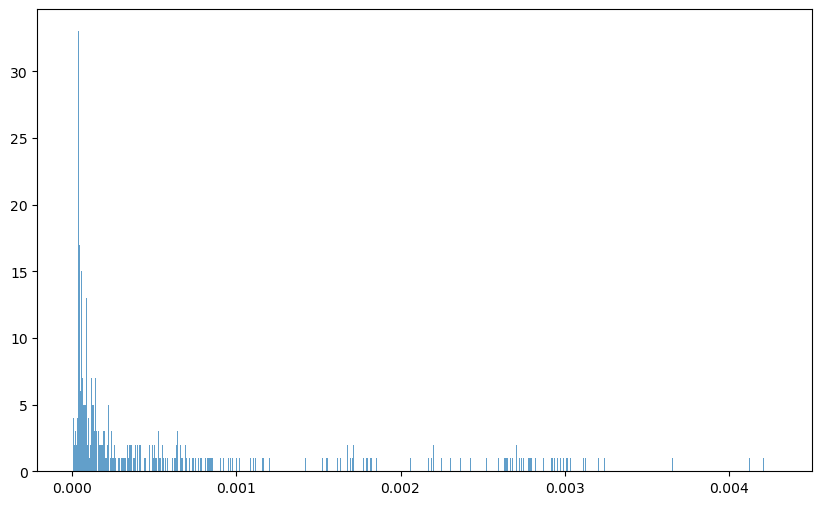

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import string

threshold = 1e-6
filtered_data = data.where(data >= threshold, drop=True)
data_np = filtered_data.sel(time=7000)['Anhydrite_VF'].values.flatten()
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(data_np, bins=1000, alpha=0.7)
fig.show()

In [16]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from cmcrameri import cm
import numpy as np
import string
mpl.rcParams.update(mpl.rcParamsDefault)

mpl.rcParams['axes.linewidth'] = 3
mpl.style.use('seaborn-poster')

time_steps = 25
i = 0
file_num=0
fontsize = 24

fig, axes = plt.subplots(1,4, figsize=(20,11))
plot_vars = ['Anhydrite'] * 4

time = 21

scale_factors = (1,1,1,1)
temperature = 15

#range_sets = [(1,6), (7,10), (11,15), (16,20)]
# Temporarily change range set to account for missing file at start.
if temperature == 15:
    range_sets = [(1,6), (7,10), (12,15), (16,19)]
else: 
    range_sets = [(1,6), (7,10), (11,14), (15,18)]
labels = [[10, 20, 30, 40, 50, 60],
          [10, 20, 30, 40],
          [10, 20, 30, 40],
          [2.0, 2.2, 2.4, 2.6, 2.8]]

linestyles = ['-', '--']
legend_titles = ['[Mg$\mathbf{^{2+}}$] / mM', '[Ca$\mathbf{^{2+}}$] / mM \n [SO$\mathbf{_4}}$] = 28.3 mM', '[SO$\mathbf{_4}}$] / mM \n [Ca$^\mathbf{2+}}$] = 10.3 mM', '[HCO$\mathbf{_3}^-$] / mM']

x_lims= [(0,10), (0,6), (0,6), (0,6)]
cols = ['r', 'b', 'g', 'm', 'k', 'c']
temperatures = [2, 15]
 
datasets=[data]

iterables = zip(plot_vars, axes, legend_titles, scale_factors, range_sets, labels)

save_points = [0, 1, 2, 3, 5, 7, 9, 11, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

j=0

#Prep fig before plotting
for axis, x_lim in zip(axes, x_lims):
    axis.xaxis.tick_top()
    axis.xaxis.set_label_position('top')
    axis.grid(False)
    axis.tick_params(length=8, width=4)
    axis.set_xlabel(f'{plot_vars[0]} / volume fraction', fontweight='bold')
    axis.set_ylabel('Depth / m', fontweight='bold')
    #axis.set_ylim(0,200)
    #axis.set_xlim(0,45)
    for tick in axis.xaxis.get_major_ticks():
        tick.label2.set_fontweight('bold')
    for tick in axis.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    axis.invert_yaxis()

for dataset, ls, temperature in zip(datasets, linestyles, temperatures):

    iterables = zip(range(len(plot_vars)), plot_vars, axes, legend_titles, scale_factors, range_sets, labels)
    # Axis level loop
    for j, plot_var, axis, legend_title, scale, range_set, label_a in iterables:
        axis.text(-0.25, 1.05, '({})'.format(string.ascii_uppercase[j]), transform=axis.transAxes, size=20, weight='bold')
        # Line set loop (i.e. groups of lines sharing a property)
        # Line instance loop
        index = np.arange(range_set[0]-1, range_set[1])
        for ind, label, c in zip(index, label_a, cols):
            if i == ind:
               axis.set_prop_cycle(None)
            try:
                x = dataset[category].isel(file_num = ind, time=time, Y=0, Z=0)[plot_var].to_numpy() * scale
                y = dataset[category].isel(file_num = ind, time=time, Y=0, Z=0)['X'].values
            except IndexError:
                x=0
                y=0
            axis.plot(x, y, label=f'{label}', linestyle=ls, c=c)
            leg = axis.legend(title=legend_title, prop={'weight': 'bold', 'size': 15}, title_fontproperties={'weight': 'bold', 'size': 15}, framealpha=0, loc='upper right')
            leg.get_title().set_multialignment('center')


fig.tight_layout()

fig.savefig(f'output/{plot_var}_depth_by_exp.png', dpi=300)
fig.show()

/var/folders/86/d5n0l2wj5yn0p84q_4jzm_6r0000gn/T/ipykernel_25536/3466847042.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-poster')


<IPython.core.display.Javascript object>